In [44]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json

# Data Acquisition: web scraping and API

<img src='https://imgs.xkcd.com/comics/api.png' width="200">

Source: [xqcd 1481](https://xkcd.com/1481/)

## Content

The goal of this walkthrough is to provide you with insights on exploratory data analysis throughout the use of a fun and interactive technique known as web scraping. During this laboratory, you will be provided with a broad overview of this technique as well as the major tools used in the process. You will also understand how data analysis can be conducted on real-time web data and hopefully see how this combination can be further applied to any other context. 

In essence, web scraping consists in harvesting the content of a web page in order to process its information for further use. In our example, web scraping is used as a fun way to extract data that we will analyze afterwards. In most cases, this technique comes hand in hand with data cleaning and data analysis. For further information on web scraping, click on the following [link](https://en.wikipedia.org/wiki/Web_scraping).

**Note :** You can also refer to this [tutorial](https://www.geeksforgeeks.org/python-web-scraping-tutorial/) at any time for additional informations on this topic from a course.

This notebook is organized as follows:
- [Web scraping with Pandas](#Web-scraping-with-Pandas)
    - [Your turn!](#Your-turn!)
- [Web scraping libraries](#Web-scraping-libraries)
- [Retrieving the data](#Retrieving-the-data)
- [Parsing the data](#Parsing-the-data)
    - [Finding elements by class](#Finding-elements-by-class)
    - [Finding specific elements](#Finding-specific-elements)
- [Your turn to scrap!](#Your-turn-to-scrap!)
- [API](#API)


## Web scraping with Pandas

You are already familiar with the Pandas library and its DataFrame. Many different functions were presented to you for Dataframe manipulation. You should have noticed by now that this is a really usefull library when it comes to using tables. More over, one of the perks of using  Pandas is that you can directly scrap HTML tables from the web... Lets dive into it.

The main function we are going to be using is `read_html`, it allows you the directly put the data of webpage table into a DataFrame. For more information, just click on this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html). 

For example, imagine we wanted to demonstrate the importance of the research department for the future of a company, we would have at some point to provide evidences for such statement. To that end, lets get the [top 50 companies](https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending) with the highest research and development expenses in 2018.

In [45]:
scraped_companies = pd.read_html('https://en.wikipedia.org/wiki/List_of_companies_by_research_and_development_spending')
print("scraped tables " , len(scraped_companies))

scraped tables  6


The `read_html` function scraps any table from the webpage of interest as long as it has the right format.

In [46]:
scraped_companies[1].head()

,Rank,Company,Country,Sector,Expenditures on R&D (billions of US$)
0,1,Amazon,United States,Software and Internet,22.62
1,2,Alphabet Inc.,United States,Software and Internet,16.23
2,3,Volkswagen Group,Germany,Automotive,15.77
3,4,Samsung Electronics,South Korea,Computing and Electronics,15.31
4,5,Microsoft,United States,Software and Internet,14.74


### Your turn!

[Manganese](https://en.wikipedia.org/wiki/Manganese) is one the mineral identified as critical for the energy transition, due to its applications for batteries and wind turbine for instance. 

- Extract the list of countries by manganese production ([link](https://en.wikipedia.org/wiki/List_of_countries_by_manganese_production))
- Use `loc` to extract the manganese production of Gabon

In [47]:
scraped_mang_companies = pd. read_html("https://en.wikipedia.org/wiki/List_of_countries_by_manganese_production")
print("Scraped Manganese companies" , len(scraped_mang_companies)) #is this the amount of tables that are found in the html?


Scraped Manganese companies 2


In [48]:
#scraped_mang_companies[0] = scraped_mang_companies[0].drop(0) # could also drop all Nan's
scraped_mang_countries = scraped_mang_companies[0]
scraped_mang_countries

,Rank,Country/Region,Manganese production (tonnes)
0,NaN,World,18000000
1,1.0,South Africa,6200000
2,2.0,China,3000000
3,3.0,Australia,2900000
4,4.0,Gabon,1800000
5,5.0,Brazil,1000000
6,6.0,India,950000
7,7.0,Malaysia,400000
8,8.0,Ukraine,390000
9,9.0,Kazakhstan,390000


In [49]:
scraped_Gabon = scraped_mang_countries.loc[scraped_mang_countries["Country/Region"] == "Gabon", "Manganese production (tonnes)"]
print(f"Manganese production of Gabon is: {int(scraped_Gabon)} tonnes") #the int makes sure to convert the outcome to a string and  therefore not include the data information that would come with it.
# Print the country and manganese production values
#print("Country:", scraped_Gabon.at[4, 'Country/Region'])
#print("Manganese production:", scraped_Gabon.at[4, 'Manganese production (tonnes)'])


Manganese production of Gabon is: 1800000 tonnes


## Web scraping libraries

In order to get the data from the Web with Python, we will require during the course of this lab to use the following two essential libraries:

*  Requests (HTTP): retrieves the web pages (html) to parse.
*  Beautiful Soup (HTML Parsing): parses the html.

If you are working on this notebook in Colab or using JupyterLab, no specific environmental installation should be needed to work on this lab. We can directly import the needed libraries (see top of the notebook). Otherwise just install the libraries in your Anaconda/Python environment.

## Retrieving the data

In order to get started with web scraping we must first make a [request](https://requests.readthedocs.io/en/master/user/quickstart/). In simple words, we will ask the server hosting the webpage we are interested in its content.

Let's try it! We can use the ``requests.get`` method to retrieve information from a specified URL. 

We will parse through the life of [Muḥammad ibn Mūsā al-Khwārizmī](https://en.wikipedia.org/wiki/Muhammad_ibn_Musa_al-Khwarizmi). Al-Khwarizmi was a Persian polymath who is described as the father of algebra, the term originating from the title of his book *al-jabr*, meaning "completion" or "rejoining". From his name is also derived the word *algorithm*. An algorithm is a finite sequence of instructions to solve a problem - in other words it is a recipe. All the Machine Learning techniques you will see in this course are algorithms!

In [50]:
# Make the request
r = requests.get('https://en.wikipedia.org/wiki/Muhammad_ibn_Musa_al-Khwarizmi')

We obtain a response object. We can check the status of our request using the library method ``status_code``. You can find more on the HTTP status code on this [link](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes). A code of **200** means the HTTP request was successfully completed. The response header display metadata about the request itself:

In [51]:
# Status Code
print('Response status code: {0}\n'.format(r.status_code))
print(r.headers)

Response status code: 200

{'date': 'Sun, 05 Mar 2023 14:24:47 GMT', 'server': 'mw2315.codfw.wmnet', 'x-content-type-options': 'nosniff', 'content-language': 'en', 'vary': 'Accept-Encoding,Cookie,Authorization', 'last-modified': 'Sun, 05 Mar 2023 14:10:50 GMT', 'content-type': 'text/html; charset=UTF-8', 'content-encoding': 'gzip', 'age': '12176', 'x-cache': 'cp6013 hit, cp6011 hit/4', 'x-cache-status': 'hit-front', 'server-timing': 'cache;desc="hit-front", host;desc="cp6011"', 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload', 'report-to': '{ "group": "wm_nel", "max_age": 604800, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }', 'nel': '{ "report_to": "wm_nel", "max_age": 604800, "failure_fraction": 0.05, "success_fraction": 0.0}', 'set-cookie': 'WMF-Last-Access=05-Mar-2023;Path=/;HttpOnly;secure;Expires=Thu, 06 Apr 2023 12:00:00 GMT, WMF-Last-

**Note :** Requesting data from a website is not always straightforward. There can be some restrictions made by the server hosting the page regarding the request origin, content or number. As such, you should always pay attention to the request policy of a website before scraping it. The standards used by websites to indicate which portions can be scraped is called [robots.txt](https://en.wikipedia.org/wiki/Robots.txt). In the case of Wikipedia, here it is:  [link](https://en.wikipedia.org/robots.txt).

Now, lets see the raw content of our request. The body of the response here will be in HTML since we are asking for a webpage. Different format such as  JSON or XML could also be imagined for web services.

In [52]:
print(r.text[:3000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Muhammad ibn Musa al-Khwarizmi - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=docume

## Parsing the data

Now as you can see, the HTTP response's body as it is, is hardly usable. Therefore, we rely on BeautifulSoup to parse the content for further processing. Thus, we specify that we need the html.parser. For more information, you can click [here.](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser)

BeautifulSoup, thanks to parsing the content, will allow us to conduct a series of different operations and commands that you will be discovering in the remaining part of this lab. This library can be very powerful and complete when it comes to parsing and manipulations. This overview is not meant to display all possible features offered by BeautifulSoup.

Before getting out any information from the HTML page, it is best to understand the structure of the page. We can do so by right-clicking on the page and select "Inspect", which will open the Developer Tools:

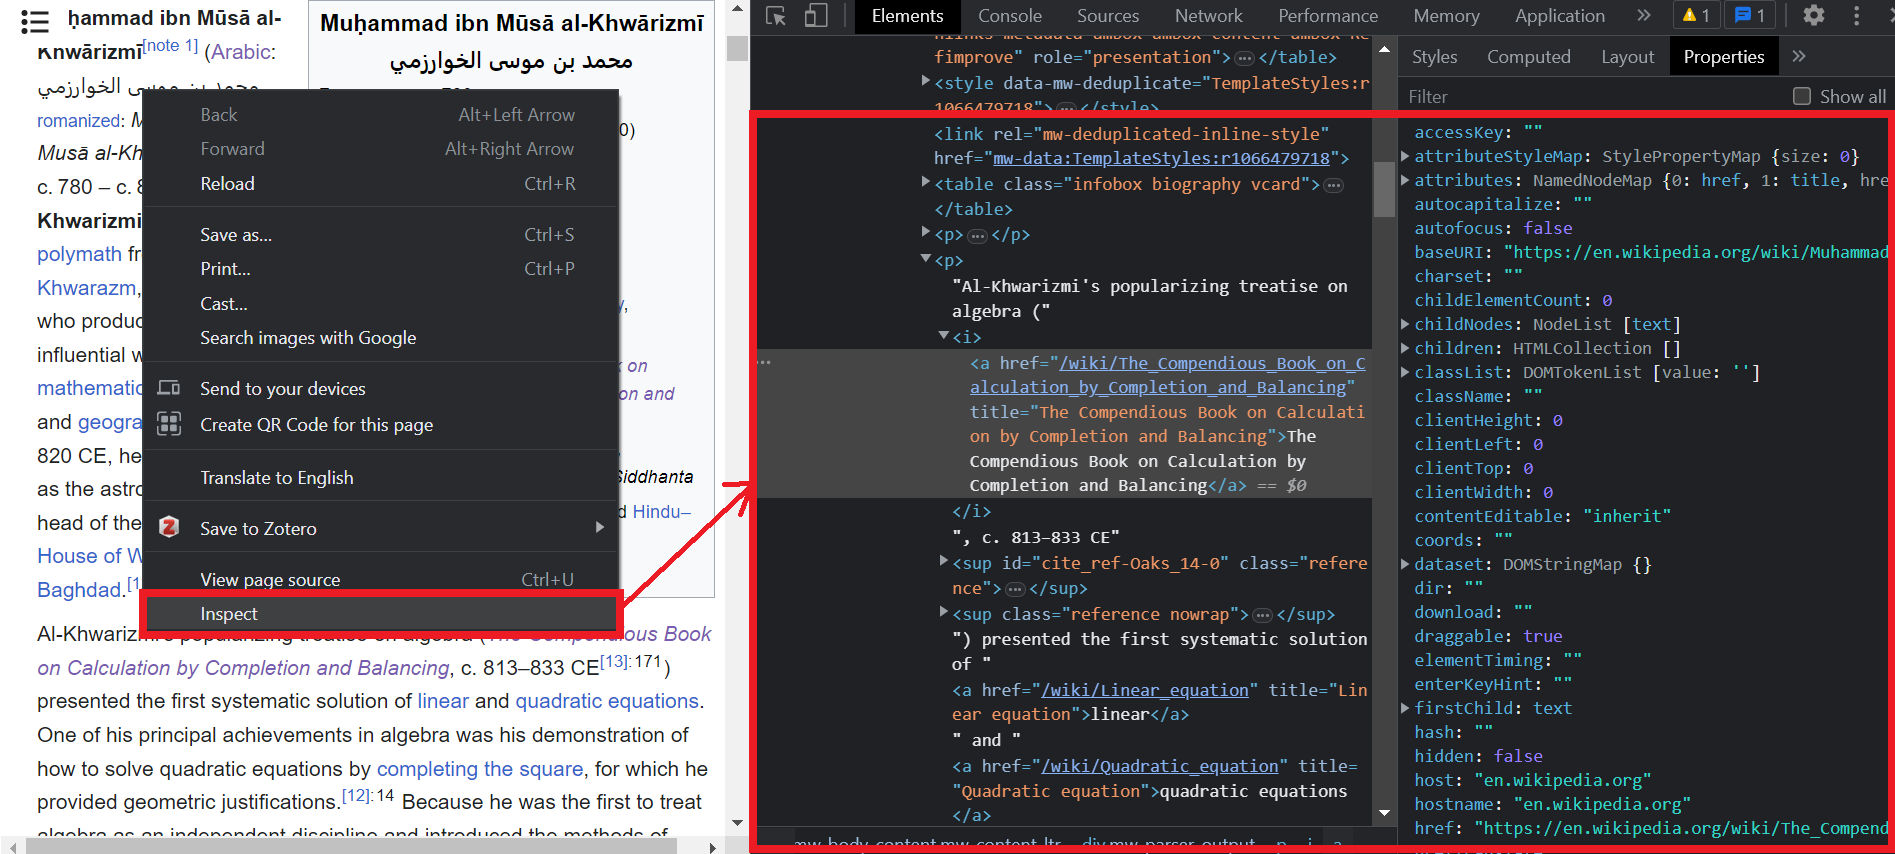

Ok, let's start to parse this raw HTML code. We create a BeautifulSoup object:

In [53]:
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

We can now extract information from the page. Let's first get the title:

In [54]:
soup.title

<title>Muhammad ibn Musa al-Khwarizmi - Wikipedia</title>

Yet, this is stil in HTML format, therefore using the ``.string`` method allows for a more conventional layout.

In [55]:
soup.title.string

'Muhammad ibn Musa al-Khwarizmi - Wikipedia'

To go further with this laboratory and with Data retrieval after parsing, some HTML notions are required. In essence, you should get acquainted with concepts like **HTML tags**. Several functions and manipulations allowed by BeautifulSoup rely on the different tags (headers, divisions, paragraphs, classes, ids etc..) to retrieve the data they contain. You can find more on HTML tags [here](https://www.w3schools.com/html/html_elements.asp).

**Important** : All the manipulations that are performed bellow rely on a study of the HTML body of the response. As it is specific to the website, it is fundamental to understand how to retrieve the information and how to get it from.  

We will extensively use ``soup.find`` and ``soup.find_all`` to navigate the data structure, please do not hesitate to refer to the corresponding [documentation](https://https://www.crummy.com/software/BeautifulSoup/bs4/doc/) for more information.

### Finding elements by class

#### Retrieving links

The "a" tag as it is generally used for website links embedding (combined with ``href``). With `find_all`, we can retrieve all the links:

In [56]:
links = soup.find_all('a')
print(f'The webpage contains {len(links)} links.')

The webpage contains 1679 links.


We obtain a list of all the links in the webpage. Let's check some of them:

In [57]:
print(links[0])
print(links[74])
print(links[229])

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>
<a class="interlanguage-link-target" href="https://bcl.wikipedia.org/wiki/Muhammad_ibn_Musa_al-Khwarizmi" hreflang="bcl" lang="bcl" title="Muhammad ibn Musa al-Khwarizmi – Central Bikol"><span>Bikol Central</span></a>
<a class="mw-redirect" href="/wiki/Arabic_language" title="Arabic language">Arabic</a>


As we can see, we have different types of links, i.e., different `class`. For instance, "my-jump-link" corresponds to cross-reference links, "interlanguage-link-target" redirects to the same article in another language, and "mw-redirect" to other Wikipedia pages in English.

Let's extract all the links correspond to the class "mw-redirect". We can do so by adding a second argument to `find_all`:

In [58]:
links_Wiki_redirect = soup.find_all('a', class_="mw-redirect")
print(links_Wiki_redirect[:3])

[<a class="mw-redirect mw-disambig" href="/wiki/Al-Khw%C4%81rizm%C4%AB_(disambiguation)" title="Al-Khwārizmī (disambiguation)">al-Khwārizmī (disambiguation)</a>, <a class="mw-redirect" href="/wiki/Arabic_language" title="Arabic language">Arabic</a>, <a class="mw-redirect" href="/wiki/Mathematics_in_medieval_Islam" title="Mathematics in medieval Islam">mathematics</a>]


We can know access the URL of the links, which is accessible with the property `href`. We can use the method `get` to extract these properties.

In [168]:
print(links_Wiki_redirect[1])
print(links_Wiki_redirect[1].get('href'))

<a class="mw-redirect" href="/wiki/Arabic_language" title="Arabic language">Arabic</a>
/wiki/Arabic_language


Notice the format: 'href' only contains the end of the URL. We thus need to add the beginning to obtain proper links:

In [60]:
url_wiki = 'https://en.wikipedia.org'
print(url_wiki + links_Wiki_redirect[1].get('href'))

https://en.wikipedia.org/wiki/Arabic_language


Ok! Let's do it one more time. This time we'll print all the links corresponding to the images in the article:

In [61]:
image_links = soup.find_all('a', class_="image")
for l in image_links:
    print(url_wiki + l.get('href'))

https://en.wikipedia.org/wiki/File:Question_book-new.svg
https://en.wikipedia.org/wiki/File:Madrid_-_Ciudad_Universitaria,_Monumento_a_Muhammad_al-Juarismi.jpg
https://en.wikipedia.org/wiki/File:Image-Al-Kit%C4%81b_al-mu%E1%B8%ABta%E1%B9%A3ar_f%C4%AB_%E1%B8%A5is%C4%81b_al-%C4%9Fabr_wa-l-muq%C4%81bala.jpg
https://en.wikipedia.org/wiki/File:The_Algebra_of_Mohammed_ben_Musa_(Arabic).png
https://en.wikipedia.org/wiki/File:The_Algebra_of_Mohammed_ben_Musa_(English).png
https://en.wikipedia.org/wiki/File:Dixit_algorizmi.png
https://en.wikipedia.org/wiki/File:Gregor_Reisch,_Margarita_Philosophica,_1508_(1230x1615).png
https://en.wikipedia.org/wiki/File:Corpus_Christ_College_MS_283_(1).png
https://en.wikipedia.org/wiki/File:Al-Khwarizmi%27s_map.png
https://en.wikipedia.org/wiki/File:PtolemyWorldMap.jpg
https://en.wikipedia.org/wiki/File:Earliest_extant_map_of_the_Nile,_in_al-Khw%C4%81razm%C4%AB%E2%80%99s_Kit%C4%81b_%E1%B9%A3%C5%ABrat_al-_ar%E1%B8%8D.jpg
https://en.wikipedia.org/wiki/File:1983_

#### Retrieving text

Another common operation is to extract text from a website. If we inspect the page, we notice that the text is under the 'p' tag. We proceed as before, finding all 'p' tags in the page.

In [62]:
text = soup.find_all('p')
text[1]

<p><b>Muḥammad ibn Mūsā al-Khwārizmī</b><sup class="reference" id="cite_ref-6"><a href="#cite_note-6">[note 1]</a></sup> (<a class="mw-redirect" href="/wiki/Arabic_language" title="Arabic language">Arabic</a>: <span dir="rtl" lang="ar">محمد بن موسى الخوارزمي</span>, <small><a href="/wiki/Romanization_of_Arabic" title="Romanization of Arabic">romanized</a>: </small><span title="Arabic-language romanization"><i lang="ar-Latn">Muḥammad ibn Musā al-Khwārazmi</i></span>; <span title="circa">c.</span><span style="white-space:nowrap;"> 780</span> – c.<span style="white-space:nowrap;"> 850</span>), or <b>al-Khwarizmi</b>, was a <a href="/wiki/Persians" title="Persians">Persian</a> <a href="/wiki/Polymath" title="Polymath">polymath</a> from <a href="/wiki/Khwarazm" title="Khwarazm">Khwarazm</a>,<sup class="reference" id="cite_ref-Corbin_1998_44_7-0"><a href="#cite_note-Corbin_1998_44-7">[6]</a></sup><sup class="reference" id="cite_ref-8"><a href="#cite_note-8">[7]</a></sup><sup class="reference

As we can see, the format we get is not yet readable. For instance, we have various references in our paragraph that are displayed with HTML format. To extract the actual text, we can use the `text` method:

In [63]:
for t in text[0:5]:
    print(t.text)



Muḥammad ibn Mūsā al-Khwārizmī[note 1] (Arabic: محمد بن موسى الخوارزمي, romanized: Muḥammad ibn Musā al-Khwārazmi; c. 780 – c. 850), or al-Khwarizmi, was a Persian polymath from Khwarazm,[6][7][8][9][10][11] who produced vastly influential works in mathematics, astronomy, and geography. Around 820 CE, he was appointed as the astronomer and head of the library of the House of Wisdom in Baghdad.[12]: 14 

Al-Khwarizmi's popularizing treatise on algebra (The Compendious Book on Calculation by Completion and Balancing, c. 813–833 CE[13]: 171 ) presented the first systematic solution of linear and quadratic equations. One of his principal achievements in algebra was his demonstration of how to solve quadratic equations by completing the square, for which he provided geometric justifications.[12]: 14  Because he was the first to treat algebra as an independent discipline and introduced the methods of "reduction" and "balancing" (the transposition of subtracted terms to the other side of an

Not bad! We probably need more cleaning but have achieved a readable version!

### Finding specific elements

Above we have extracted all elements with a given tag or class. What if we want a specific element? We can generally use the `id`.

For instance, let's try to extract the table of content, using `find`. By inspecting the page, we observe that the table of content falls under the `div` tag while its `id` is "vector-toc".

In [64]:
content = soup.find('div', id="vector-toc")
print(content)

<div class="vector-toc vector-pinnable-element" id="vector-toc">
<div class="vector-pinnable-header vector-toc-pinnable-header vector-pinnable-header-pinned" data-name="vector-toc">
<h2 class="vector-pinnable-header-label">Contents</h2>
<button class="vector-pinnable-header-toggle-button vector-pinnable-header-pin-button" data-event-name="pinnable-header.vector-toc.pin">move to sidebar</button>
<button class="vector-pinnable-header-toggle-button vector-pinnable-header-unpin-button" data-event-name="pinnable-header.vector-toc.unpin">hide</button>
</div>
<ul class="vector-toc-contents" id="mw-panel-toc-list">
<li class="vector-toc-list-item vector-toc-level-1" id="toc-mw-content-text">
<a class="vector-toc-link" href="#">
<div class="vector-toc-text">(Top)</div>
</a>
</li>
<li class="vector-toc-list-item vector-toc-level-1 vector-toc-list-item-expanded" id="toc-Life">
<a class="vector-toc-link" href="#Life">
<div class="vector-toc-text">
<span class="vector-toc-numb">1</span>Life</div>
<

As always, we need a little more processing before obtaining a readable result. The text of the table of content falls under the `class` "vector-toc-text":

In [65]:
toc = content.find_all('div', class_='vector-toc-text')

for l in toc:
    print(l.text)

(Top)

1Life

2Contributions

2.1Algebra

2.2Arithmetic

2.3Astronomy

2.4Trigonometry

2.5Geography

2.6Jewish calendar

2.7Other works

3Honors

4Notes

5References

6Further reading

6.1Specific references

6.1.1Biographical

6.1.2Algebra

6.1.3Arithmetic

6.1.4Astronomy

6.1.5Spherical trigonometry

6.1.6Jewish calendar

6.1.7Geography

6.2General references


## Your turn to scrap!


Now it's your turn to practice. We will use the [Stanford Encyclopedia of Philosophy](https://plato.stanford.edu/index.html) (SEP), an online encyclopedia of philosophy and related fields. We will use the [Biodiversity](https://plato.stanford.edu/entries/biodiversity/) entry.

Extract the Biodiversity article of the SEP, and print the status code of the response:

In [66]:
# extract article and print status code

bio_article = pd.read_html("https://plato.stanford.edu/entries/biodiversity/")
print (bio_article)
#make a request
b = requests.get("https://plato.stanford.edu/entries/biodiversity/")
#print status code
# Status Code 200 -> website is reacting fine
print('Response status code: {0}\n'.format(b.status_code))
print(b.headers)

[    0                                                  1
0 NaN                            How to cite this entry.
1 NaN  Preview the PDF version of this entry at the  ...
2 NaN  Look up topics and thinkers related to this en...
3 NaN  Enhanced bibliography for this entry at PhilPa...]
Response status code: 200

{'Server': 'nginx', 'Date': 'Sun, 05 Mar 2023 17:47:47 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload'}


Parse the text, and print the title of the article.

In [67]:
page_body = b.text #it doesn't matter if we use text or content , as I can varie this after the parsing
soup = BeautifulSoup(page_body,"html.parser")
print(soup.title.string)


Biodiversity (Stanford Encyclopedia of Philosophy)



In [68]:
print(soup.url)

None


In [69]:
print(soup.header)

None


In [70]:
print(soup.contents)

['html', '\n', '[if lt IE 7]> <html class="ie6 ie"> <![endif]', '\n', '[if IE 7]>    <html class="ie7 ie"> <![endif]', '\n', '[if IE 8]>    <html class="ie8 ie"> <![endif]', '\n', '[if IE 9]>    <html class="ie9 ie"> <![endif]', '\n', '[if !IE]> ', ' ', <html> <!-- <![endif]-->
<head>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>
Biodiversity (Stanford Encyclopedia of Philosophy)
</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="noarchive, noodp" name="robots"/>
<meta content="Biodiversity" property="citation_title"/>
<meta content="Faith, Daniel P." property="citation_author"/>
<meta content="2003/06/11" property="citation_publication_date"/>
<meta content="Biodiversity" name="DC.title"/>
<meta content="Faith, Daniel P." name="DC.creator"/>
<meta content="2003-06-11" name="DCTERMS.issued"/>
<meta content="2021-02-04" name="DCTERMS.modified"/>
<!-- NOTE: Import webfonts using this link: -->
<link href="https:/

In [71]:
print(soup.title)

<title>
Biodiversity (Stanford Encyclopedia of Philosophy)
</title>


In [72]:
soup.title.string

'\nBiodiversity (Stanford Encyclopedia of Philosophy)\n'

In [73]:
print(soup.title.parent.name)

head


In [74]:
# Parsing the text
page_body = b.text #OR
content_b = soup.find_all("p")

#soup = BeautifulSoup(page_body, 'html.parser')
#Printing the article title 



In [75]:
#printing the text of the article
content_b # to make sure to onyl include nice written text -> I must get rid of html layout

for t in content_b:  # t is ever word by iterating thtough it I make sure that every word goes through the text transformation to get rid of html
    print(t.text)


The term “biodiversity” is a contraction of
“biological diversity” or “biotic diversity”.
These terms all refer to the idea of living variation, from genes and
traits, to species, and to ecosystems. The popular contraction
“biodiversity” came about in the mid-1980s, heralded by a
symposium in 1986 and an influential follow-up book,
Biodiversity (Wilson 1988). These events often are
interpreted as the beginning of the biodiversity story, but this
mid-1980s activity actually was both a nod to important past work, and
a launching of something quite new, in ways not fully anticipated.

The new term “biodiversity” energised some fundamental
ideas developed over the previous decade (or longer). Precursor terms
like “biotic diversity” had helped to communicate why we
should be concerned about the loss of variety, arising from the
species extinction crisis (later, the “biodiversity
crisis”). This recognised the idea that living variation itself
has current value, because it provides the oppor

Print the text of the article.

Print the url of the Figure A:

In [76]:
links = soup.find_all("a")
print(f"The webpage contains {len(links)} links") #An f-string allows you to include the value of a variable or expression inside a string by wrapping it in curly braces {}.

The webpage contains 127 links


In [77]:
print(links[0]) #it doesnt give me the class associated with it#different classes like img, mw-jump-link, mw-redirect,...
print(links[5])

<a href="../../index.html"><img alt="SEP logo" src="../../symbols/sep-man-red.png"/></a>
<a href="https://plato.stanford.edu/cgi-bin/encyclopedia/random">Random Entry</a>


In [78]:
#Find all links that show images 
links_A = soup.find("div", id= "figA") #I could also classify it by class- but when I am inspecting -> the Table A doesn#t have a class
print(links_A)

<div id="figA" style="width:50%;display:inline-block">
<img alt="a diagram: link to extended description below." src="figa.svg"/>
<p class="center">
<span class="figlabeL">(a)</span></p>
</div>


In [79]:
print(links_A)

image_A = links_A.find("img").get("src") # we are getting the link that is the url from the first figure - indicated by src 

<div id="figA" style="width:50%;display:inline-block">
<img alt="a diagram: link to extended description below." src="figa.svg"/>
<p class="center">
<span class="figlabeL">(a)</span></p>
</div>


In [80]:
#href only contains the last part of the url, must also retrieve the first part 
bio_article_url = "https://plato.stanford.edu/entries/biodiversity/" #url from the beginning
print (bio_article_url + image_A)



https://plato.stanford.edu/entries/biodiversity/figa.svg


Print a list of the references (i.e. the bibliography):

In [81]:
# printing a table - bibliography
bib= requests.get("https://plato.stanford.edu/entries/biodiversity/")
# check the status code of the website 
print("Response: {0}\n".format(bib.status_code))
# parsing 
content = bib.text
bibsoup = BeautifulSoup(content, "html.parser")
# get the links of the bibliography
links = bibsoup.find("div", id ="bibliography") # searching for div as a tag, that defines a division of a web page, here it is searching for a div called bibliography
#print(links)
#now get the url references under this section
url_bibs = links.find_all("li") #li is a tag 
#print(url_bibs)

for t in url_bibs: 
    #print(t) # one t is one reference, which is made up of several parts 
    print(t.text + '\n') # after each t, I am printing a space 

Response: 200

Anonymous, 1974, “Trends, Priorities, and Needs in
Systematic and Evolutionary Biology”, Systematic
Biology, 23(3): 416–39. doi:10.1093/sysbio/23.3.416

Balvanera, Patricia, Gretchen C. Daily, Paul R. Ehrlich, Taylor H.
Ricketts, Sallie-Anne Bailey, Salit Kark, Claire Kremen, and Henrique
Pereira, 2001, “Conserving Biodiversity and Ecosystem
Services”, Science, 291(5511): 2047.
doi:10.1126/science.291.5511.2047

Balvanera, Patricia, Sandra Quijas, Berta
Martín-López, Edmundo Barrios, Laura Dee, Forest Isbell,
Isabelle Durance, Piran White, Ryan Blanchard, and Rudolf de Groot,
2016, “The Links Between Biodiversity and Ecosystem
Services”, in Routledge Handbook of Ecosystem Services,
Marion Potschin, Roy Haines-Young, Robert Fish, and R. Kerry Turner
(eds.), New York: Routledge, pp. 45–61.
doi:10.4324/9781315775302-5

Bartkowski, Bartosz, 2017, “Are Diverse Ecosystems More
Valuable? Economic Value of Biodiversity as Result of Uncertainty and
Spatial Interactions in Ecosyst

## API

An [API](https://en.wikipedia.org/wiki/API), or Application Programming Interface, is a server that we can use to retrieve and send data to using code. When using an API, we make a request to a remote web server for data, and it responds to our requests. To do so, we use the same library as before, namely `requests`. 

To ensure we make a successful request, it is crucial to **consult the API documentation**. 

**Note :** You can also refer to this [tutorial](https://www.dataquest.io/blog/python-api-tutorial/) at any time for additional information on this topic.

In this lab, we will extract weather data from [OpenWeather](https://openweathermap.org/). You will need to create a free account to obtain an API key. 

Once you have an account, check the API documentation and request the current weather data for the city of your choice using `requests.get`:

In [215]:
location = requests.get("https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=e72e44793fbb8c9c1d6089f7db147b8f")

Check that the request was successful using `status_code`.

In [216]:
# Status code
print ("Response status:", format(location.status_code)) #OR print('Response status code: {0}\n'.format(r.status_code)) #the {0}\n is a placeholder and will be replaced with the value that comes after



Response status: 200


We can now look at the data. The primary format in which data is passed back and forth to APIs is [JSON](https://www.json.org/json-en.html) (JavaScript Object Notation). 

We can check the data obtained using the `json()` method:

In [217]:
#to look at the data use json()
data= location.json()
print (data)

{'coord': {'lon': 10.99, 'lat': 44.34}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 278.14, 'feels_like': 275.37, 'temp_min': 276.8, 'temp_max': 279.3, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 923}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 206, 'gust': 5.61}, 'clouds': {'all': 13}, 'dt': 1678047501, 'sys': {'type': 2, 'id': 2004688, 'country': 'IT', 'sunrise': 1677995244, 'sunset': 1678036091}, 'timezone': 3600, 'id': 3163858, 'name': 'Zocca', 'cod': 200}


We notice that the JSON output we received from the API looked like it contained Python dictionaries, lists, strings and integers. You can think of JSON as being a combination of these objects represented as strings. To work with JSON data, we can use the `json` package ([Documentation](https://docs.python.org/3/library/json.html), [Tutorial](https://www.w3schools.com/python/python_json.asp)).



Explore the weather in your city. Print the temperature, wind speed, rain and other indicators of your choice.

In [229]:
# explore weather data
#data_city = data.json() #???
city = data["name"] 
temp = data["main"]["temp"]
wind_city = data['wind']['speed']
print("City:",city," // Temp in kelvin:", temp, " // Wind speed:", wind_city)



City: Zocca  // Temp in kelvin: 278.14  // Wind speed: 3.4


There are many other cool API out there, e.g., [NASA APIs](https://api.nasa.gov/), Google Search API [SerApi](https://serpapi.com/), Google [Earth Engine](https://earthengine.google.com/) for satellite data, [Agromonitoring](https://agromonitoring.com/) which provides satellite and weather data for agriculture, [OMDb API](https://www.omdbapi.com/) containing movie information, etc. Check them out!

In [104]:
#1. web scraping

scraped_results = pd.read_html("https://triathlon.org/results/result/2023_world_triathlon_championship_series_abu_dhabi/581954")
print("Woman:Abu Dhabi: ", len(scraped_results))



Woman:Abu Dhabi:  1


In [146]:
Top_10 = scraped_results[0].sort_values(by="Time").head(10)
#print(Top_10)
Woman_results = scraped_results[0]
Woman_german = Woman_results.loc[Woman_results["Country"] == "GER",["Pos","First Name", "Last Name","Time"]]
print(Woman_german)
#don't need to loop through the dataframe, but can just concatenate them together
# (map(str) - converstes each value in the Pos column to a string

print("The German women results in Abu Dhabi were: " + ", ".join(map(str, Woman_german['Pos'])))


   Pos First Name     Last Name      Time
5    5       Lena       Meißner  00:58:39
6    7       Nina           Eim  00:58:45
9   10       Lisa       Tertsch  00:58:53
17  18    Marlene  Gomez-Göggel  00:59:11
39  40     Anabel         Knoll  01:00:43
The German women results in Abu Dhabi were: 5, 7, 10, 18, 40


In [149]:
#make a request 
r = requests.get("https://triathlon.org/news/article/yeezy_does_it_in_the_uae_as_alex_yee_delivers_superb_wtcs_abu_dhabi_gold")
#Status Code of the website
print("Response stauts code:", r.status_code)
print(r.headers)
print(r.text[:3000]) # not useful -> need beautiful SOup to parse through raw html


Response stauts code: 200
{'Date': 'Sun, 05 Mar 2023 19:00:24 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Content-Length': '15008', 'Connection': 'keep-alive', 'Set-Cookie': 'PHPSESSID=ckeq7msassltb6sbcjcactcpr3; path=/; secure; HttpOnly, exp_last_visit=1362682646; expires=Mon, 04-Mar-2024 18:57:26 GMT; path=/; domain=.triathlon.org, exp_last_activity=1678042646; expires=Mon, 04-Mar-2024 18:57:26 GMT; path=/; domain=.triathlon.org, exp_tracker=a%3A1%3A%7Bi%3A0%3Bs%3A85%3A%22news%2Farticle%2Fyeezy_does_it_in_the_uae_as_alex_yee_delivers_superb_wtcs_abu_dhabi_gold%22%3B%7D; path=/; domain=.triathlon.org', 'Expires': 'Mon, 26 Jul 1997 05:00:00 GMT', 'Pragma': 'no-cache', 'Last-Modified': 'Sun, 05 Mar 2023 18:57:27 GMT', 'cache-control': 'max-age = 600', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'X-Cache': 'cached', 'Content-Security-Policy': 'upgrade-insecure-requests', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'X-Content-Type-Options

In [152]:
#parsing raw material html code
page_body = r.text
soup = BeautifulSoup(page_body, "html.parser")
#checking the title and content
print(soup.title.string)
print(soup.contents)


Yeezy does it in the UAE as Alex Yee delivers superb WTCS Abu Dhabi gold • World Triathlon
['html', '\n', <html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Yeezy does it in the UAE as Alex Yee delivers superb WTCS Abu Dhabi gold • World Triathlon</title>
<meta content="World Triathlon" name="author"/>
<meta content="triathlon, triathlon news, triathlon results, triathlon races, triathlon photos, duathlon, multisport, aquathlon, paratriathlon, long distance triathlon, winter triathlon, olympics" name="keywords">
<meta content="It was back to business for Britainâs Alex Yee on Friday afternoon as he delivered a trademark 5km run to hold off a strong field and earn the first" name="description">
<link href="/siteicons/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/siteicons/apple-touch-icon-60x60.png" rel="apple-touch-i

In [184]:
#checking the tags and find pics,..
links = soup.find_all("a")
print(f"The webpage contains {len(links)} links.")
print(links)
#print(links[20])
#print(links[45])
#We have different classes
#class attributes are voluntarily -> href attribute that specifies the URL that the link points to, or the class attribute that defines a CSS class for the link.

links_insta = soup.find_all("a", class_= "bg-hover-instagram")
print(links_insta)
print(f"The webpage contains {len(links_insta)} Instagram links.")

The webpage contains 355 links.
[<a href="/">World Triathlon</a>, <a class="text-center collapsed no-print" data-target="#navbar-second-toggle" data-toggle="collapse" href="#"><i class="icon-three-bars menu-toggle-icon"></i></a>, <a class="bg-hover-twitter" data-original-title="Twitter" data-placement="bottom" data-popup="tooltip" href="//twitter.com/worldtriathlon?src=secondary_nav" rel="nofollow" target="_blank"><i class="icon-twitter"></i></a>, <a class="bg-hover-instagram" data-original-title="Instagram" data-placement="bottom" data-popup="tooltip" href="//instagram.com/worldtriathlon?src=secondary_nav" rel="nofollow" target="_blank"><i class="icon-instagram"></i></a>, <a class="bg-hover-facebook" data-original-title="Facebook" data-placement="bottom" data-popup="tooltip" href="//facebook.com/worldtriathlon?src=secondary_nav" rel="nofollow" target="_blank"><i class="icon-facebook"></i></a>, <a class="bg-hover-youtube" data-original-title="YouTube" data-placement="bottom" data-popup

In [189]:
#accessing the url of the link: 
links_general = soup.find_all("a", class_= "dropdown-toggle")
print(links_general)
print(links_general[1].get("href")) # only contains the end of the link

#adding the first part of the link
url_tri = "https://triathlon.org"
print(url_tri + links_general[1].get("href"))

[<a class="dropdown-toggle" href="/events/">Events <span class="caret"></span></a>, <a class="dropdown-toggle" href="/athletes/">Athletes <span class="caret"></span></a>, <a class="dropdown-toggle" href="/multimedia/">Multimedia <span class="caret"></span></a>, <a class="dropdown-toggle" href="/about/">More <span class="caret"></span></a>]
/athletes/
https://triathlon.org/athletes/


In [197]:
#creating a loop for all image links class_= image -> there are none so I take the example from above: 

for i in links_general:
    print(url_tri + i.get("href"))

#getting all links that are on the webpage
for i in links:
    print (url_tri + i.get("href"))

https://triathlon.org/events/
https://triathlon.org/athletes/
https://triathlon.org/multimedia/
https://triathlon.org/about/
https://triathlon.org/
https://triathlon.org#
https://triathlon.org//twitter.com/worldtriathlon?src=secondary_nav
https://triathlon.org//instagram.com/worldtriathlon?src=secondary_nav
https://triathlon.org//facebook.com/worldtriathlon?src=secondary_nav
https://triathlon.org//youtube.com/worldtriathlon?src=secondary_nav
https://triathlon.org//tiktok.com/@worldtriathlon?src=secondary_nav
https://triathlon.orghttp://worldtriathlonstore.com?src=secondary_nav
https://triathlon.org/admin.php
https://triathlon.org/search/
https://triathlon.org#
https://triathlon.org/events/
https://triathlon.org/events/
https://triathlon.org/events/calendar/
https://triathlon.orghttps://wtcs.triathlon.org
https://triathlon.org/events/arena_games_triathlon/
https://triathlon.org/events/sustainability
https://triathlon.org/multisports/
https://triathlon.org/multisports/aquathlon/
https://

In [202]:
#retriving text from the webpage
text = soup.find_all("p")
print(text[0:2]) 
# -> it still contains the html format
#to retrieve just the text: 
for t in text[0:2]:
    print(t.text)


[<p>It was back to business for Britain’s <a href="https://www.triathlon.org/athletes/profile/alex_yee">Alex Yee</a> on Friday afternoon as he delivered a trademark 5km run to hold off a strong field and earn the first World Triathlon Championship Series Abu Dhabi gold of 2023.</p>, <p>It was the perfect way to banish the Championship Finals blues of 2022 for the Olympic silver medallist, 30 seconds back out of the water, bridging to the leaders early on in the 20km bike and then seeing off a field stacked with incredible running talent that had boiled down to Yee, Portugal’s <a href="https://www.triathlon.org/athletes/profile/vasco_vilaca">Vasco Vilaca</a> and Brazil’s <a href="https://www.triathlon.org/athletes/profile/manoel_messias">Manoel Messias</a> with silver and bronze respectively. </p>]
It was back to business for Britain’s Alex Yee on Friday afternoon as he delivered a trademark 5km run to hold off a strong field and earn the first World Triathlon Championship Series Abu Dh

In [207]:
#finding specific elements with the id function: 
content = soup.find("div", id ="main-header")# div under id I find many different classes,the id's differ amogn the website 
#print(content)
content_header = content.find_all("div", class_="body-container")
#print(content_header)

for l in content_header:
    print(l.text)





World Triathlon












Store 


Login



















In [214]:
#API practice on NASA data
#Nasa_key: TFIVhJcfVxpq2pNIuboTL43iJJoFtyg47M3Yawrk 
#GET https://api.nasa.gov/neo/rest/v1/feed?start_date=START_DATE&end_date=END_DATE&api_key=API_KEY 

asteroids = requests.get("https://api.nasa.gov/neo/rest/v1/feed?start_date=2022-09-07&end_date=2022-09-10&api_key=TFIVhJcfVxpq2pNIuboTL43iJJoFtyg47M3Yawrk")
print("Response status:", asteroids.status_code)

Response status: 200


In [241]:
#looking at the data
data = asteroids.json()
print(data)

#Amount of asteroids 
ast_number = data["element_count"]
print("# of Asteroids:", ast_number)
#kilometers_per_hour
speed = data[relative_velocity]
print("Speed of Asteroid: ", speed)

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-09-10&end_date=2022-09-13&detailed=false&api_key=TFIVhJcfVxpq2pNIuboTL43iJJoFtyg47M3Yawrk', 'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-09-04&end_date=2022-09-07&detailed=false&api_key=TFIVhJcfVxpq2pNIuboTL43iJJoFtyg47M3Yawrk', 'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-09-07&end_date=2022-09-10&detailed=false&api_key=TFIVhJcfVxpq2pNIuboTL43iJJoFtyg47M3Yawrk'}, 'element_count': 69, 'near_earth_objects': {'2022-09-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2329520?api_key=TFIVhJcfVxpq2pNIuboTL43iJJoFtyg47M3Yawrk'}, 'id': '2329520', 'neo_reference_id': '2329520', 'name': '329520 (2002 SV)', 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2329520', 'absolute_magnitude_h': 19.87, 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2821986791, 'estimated_diameter_max': 0.6310154296}, 'meters': {'estimated_diameter_min': 282.1986791034, 'es

NameError: name 'relative_velocity' is not defined